# QBIO490 Final Project code- Ovarian Cancer

Rebecca Aviles Barahona, Jeanne Michelle Revilla, Andrea Velazquez

In [2]:
#LOAD AND IMPORT PACKAGES AND DATA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Principal Feature Analysis
#sourced from https://biapol.github.io/blog/ryan_savill/principal_feature_analysis/readme.html
class PFA(object):
    def __init__(self, diff_n_features = 2, q=None, explained_var = 0.95):
        self.q = q
        self.diff_n_features = diff_n_features
        self.explained_var = explained_var

    def fit(self, X):
        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA().fit(X)
        
        if not self.q:
            explained_variance = pca.explained_variance_ratio_
            cumulative_expl_var = [sum(explained_variance[:i+1]) for i in range(len(explained_variance))]
            for i,j in enumerate(cumulative_expl_var):
                if j >= self.explained_var:
                    q = i
                    break
                    
        A_q = pca.components_.T[:,:q]
        
        clusternumber = min([q + self.diff_n_features, X.shape[1]])
        
        kmeans = KMeans(n_clusters= clusternumber).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
        
    def fit_transform(self,X):    
        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA().fit(X)
        
        if not self.q:
            explained_variance = pca.explained_variance_ratio_
            cumulative_expl_var = [sum(explained_variance[:i+1]) for i in range(len(explained_variance))]
            for i,j in enumerate(cumulative_expl_var):
                if j >= self.explained_var:
                    q = i
                    break
                    
        A_q = pca.components_.T[:,:q]
        
        clusternumber = min([q + self.diff_n_features, X.shape[1]])
        
        kmeans = KMeans(n_clusters= clusternumber).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
        
        return X[:, self.indices_]
    
    def transform(self, X):
        return X[:, self.indices_]

In [4]:
from sklearn import decomposition
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

pfa = PFA()

In [5]:
#Read in data from csv file containing RNAseq counts from TCGA data in R
tcga_counts= pd.read_csv("/Users/andreavelazquez/Desktop/School stuff/QBIO490/qbio490_fa23_final_ovarian/OV_rna_count.csv", index_col=0)
tcga_counts = tcga_counts.replace(0, np.nan).dropna(axis=1)

In [22]:
#normalize
log2counts = np.log2(tcga_counts)

In [23]:
#pfa.fit(log2counts)
#genes_list = pfa.indices_
genes_list = [4418,
 12535,
 3899,
 6645,
 1115,
 195,
 4515,
 4776,
 7093,
 11638,
 12195,
 4721,
 11618,
 3043,
 12524,
 8592,
 9204,
 15828,
 4127,
 9159,
 8901,
 8058,
 30,
 4631,
 6091,
 8092,
 6825,
 2723,
 3011,
 12219,
 1379,
 90,
 11718,
 48,
 14387,
 15672,
 1616,
 7669,
 11068,
 13051,
 4985,
 4320,
 8032,
 3025,
 10915,
 1242,
 71,
 5379,
 4661,
 5935,
 6470,
 898,
 12185,
 5651,
 3141,
 5594,
 11828,
 9279,
 4726,
 10279,
 5567,
 9592,
 10972,
 1013,
 11725,
 3776,
 6434,
 12858,
 3800,
 4546,
 4993,
 893,
 506,
 1208,
 10074,
 11774,
 6264,
 5250,
 3302,
 1882,
 3575,
 2423,
 11580,
 5293,
 3929,
 4059,
 3623,
 915,
 4710,
 729,
 12591,
 12706,
 9127,
 4779,
 11236,
 2447,
 9863,
 4500,
 1502,
 1713,
 3657,
 9030,
 9055,
 1473,
 1778,
 3467,
 9693,
 5443,
 291,
 4270,
 6713,
 7765,
 1728,
 1809,
 2149,
 5299,
 10243,
 12335,
 9878,
 3942,
 3127,
 327,
 1062,
 2538,
 3609,
 4890,
 9755,
 2076,
 11409,
 1112,
 4029,
 5394,
 12667,
 1752,
 3286,
 5136,
 714,
 562,
 6267,
 3415,
 395,
 563,
 9703,
 3673,
 814,
 5517,
 4002,
 3813,
 8064,
 10783,
 464,
 10732,
 7654,
 8814,
 1137,
 9615,
 1342,
 6957,
 8828,
 6366,
 6800,
 6522,
 6362,
 8757,
 2798,
 519,
 1671,
 11864,
 7580,
 4902,
 7206,
 6131,
 6511,
 7242,
 3027,
 4399,
 11049,
 7892,
 6385,
 4941,
 6311,
 10837,
 1339,
 962,
 996,
 13740,
 12231,
 7039,
 1174,
 6176,
 1218,
 10305,
 9432,
 12177,
 8989,
 1355,
 7538,
 1429,
 1427,
 12474,
 4655,
 5335,
 1528,
 2008,
 4959,
 2605,
 11347,
 14903,
 1864,
 1865,
 8958,
 9687,
 10050,
 9974,
 4129,
 15964,
 8818,
 14224,
 3785,
 6169,
 13290,
 10742,
 12345,
 8041,
 4560,
 10617,
 4958,
 8227,
 6557,
 8107,
 7874,
 8836,
 14179,
 15830,
 13368,
 13922,
 11383,
 14653,
 13115,
 12743,
 15521,
 13818,
 13871,
 13889,
 14368,
 14731]

In [35]:
from umap import UMAP
scaler= StandardScaler()
reducer = UMAP(min_dist=0.05, n_neighbors=3,metric='manhattan')
scaled = scaler.fit_transform(log2counts.iloc[:, genes_list])
embedding = reducer.fit_transform(scaled)

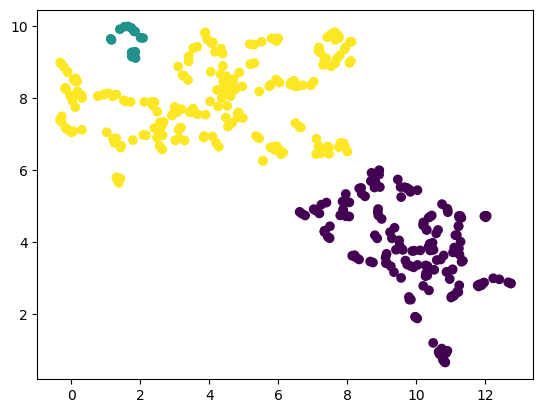

In [36]:
from hdbscan import HDBSCAN
clusterer = HDBSCAN(cluster_selection_epsilon=1)
labels = clusterer.fit_predict(embedding)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels)

In [37]:
#extract barcode for each patient
px0= labels ==0
px0_barcodes= log2counts.loc[px0, :].index.tolist()

px1= labels ==1
px1_barcodes= log2counts.loc[px1, :].index.tolist()

px2= labels ==2
px2_barcodes= log2counts.loc[px2, :].index.tolist()

px3= labels ==3
px3_barcodes= log2counts.loc[px3, :].index.tolist()

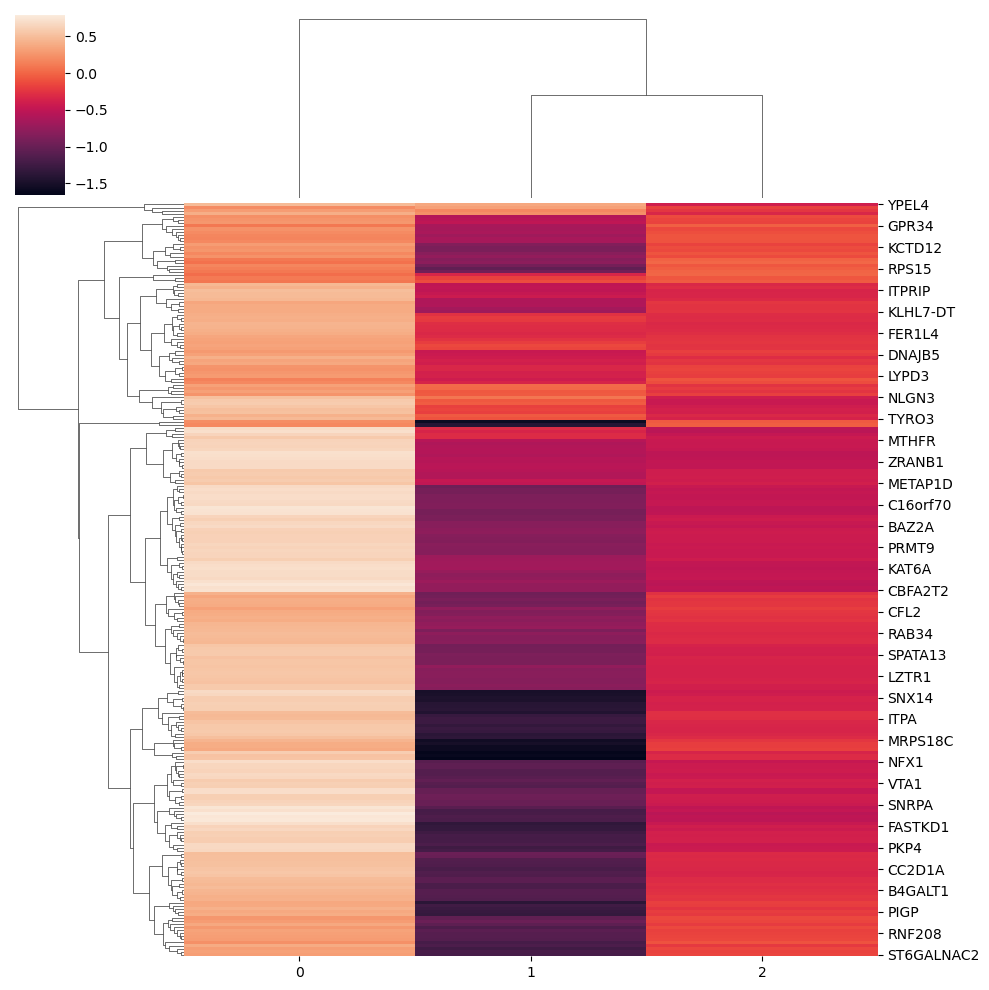

In [39]:
#seaborn plot showing expression of 246 genes
scaled = scaler.fit_transform(log2counts)
genes_by_cluster = pd.DataFrame(index=np.unique(labels), columns=log2counts.columns[genes_list])

for lab in sorted(labels):
	lab_mask = labels==lab
	tot_amts = pd.DataFrame(scaled).loc[lab_mask, genes_list].mean()
	genes_by_cluster.loc[lab, :] = np.array(tot_amts)

genes_by_cluster = genes_by_cluster.astype(float).T
#remove outlier cluster (label=-1)
#genes_by_cluster = genes_by_cluster.drop(columns=[-1])
sns.clustermap(genes_by_cluster.iloc[:, ])



In [40]:
#export barcodes from dataset to csv for R analysis
barcodes= pd.DataFrame(data= log2counts.index)
barcodes["label"]= labels
barcodes.shape
#barcodes.to_csv("/Users/andreavelazquez/Desktop/School stuff/QBIO490/qbio490_fa23_final_ovarian/cluster_barcodes.csv")

(429, 2)

In [41]:
#extract genes by cluster and sort for most expressed to least
genes_by_cluster
genes0= genes_by_cluster.loc[: , 0]
genes0= genes0.sort_values(ascending= False)
genes0.to_csv("/Users/andreavelazquez/Desktop/School stuff/QBIO490/qbio490_fa23_final_ovarian/genes0.csv")

genes1= genes_by_cluster.loc[:, 1]
genes1= genes1.sort_values(ascending= False)
genes1.to_csv("/Users/andreavelazquez/Desktop/School stuff/QBIO490/qbio490_fa23_final_ovarian/genes1.csv")


genes2= genes_by_cluster.loc[:, 2]
genes2= genes2.sort_values(ascending= False)
genes2.to_csv("/Users/andreavelazquez/Desktop/School stuff/QBIO490/qbio490_fa23_final_ovarian/genes2.csv")


genes3= genes_by_cluster.loc[:, 3]
genes3= genes3.sort_values(ascending=False)
genes3.to_csv("/Users/andreavelazquez/Desktop/School stuff/QBIO490/qbio490_fa23_final_ovarian/genes3.csv")


KeyError: 3

Obtain unique genes for each cluster from top 50 most expressed genes

In [1060]:
total_genes = list(genes0.index[:50])+list(genes1.index[:50])+list(genes2.index[:50])+list(genes3.index[:50])
uq_mask = pd.Series(total_genes).value_counts() == 1
uq_genes = pd.Series(total_genes).value_counts()[uq_mask].index

In [1078]:
unique0= np.intersect1d(uq_genes,list(genes0.index[:50]))

In [1070]:
unique1= np.intersect1d(uq_genes,list(genes1.index[:50]))

In [1074]:
unique2= np.intersect1d(uq_genes,list(genes2.index[:50]))

In [1075]:
unique3= np.intersect1d(uq_genes,list(genes3.index[:50]))

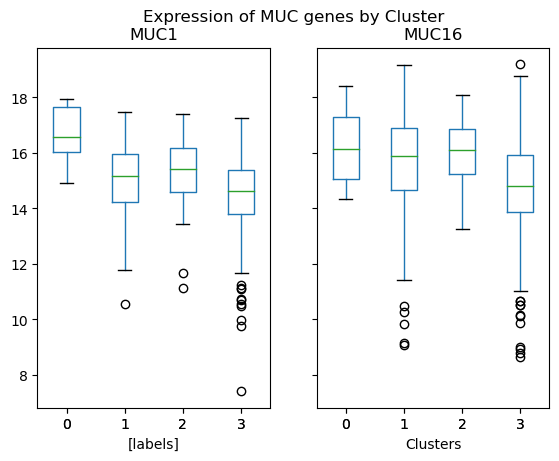

In [133]:
#Boxplots to analyze MUC1 and MUC16 expression across clusters
#The labels that are not corresponding to the final figures used 
#were changed in the slides using textboxes. 
muc= ["MUC1", "MUC16"]
muc_counts= log2counts.loc[: , muc]

#labels from the clusters we used
labels= [3,1,3,3,3,1,1,1,3,2,3,3,1,1,1,3,0,3,3,3,1,1,2,0,3,3,1,3,1,-1,3,3,3,1,3,1,2,2,2,3,3,3,1,1,3,3,0,3,3,1,1,1,3,1,2,1,2,1,3,3,2,3,0,3,1,1,3,3,1,3,1,1,2,3,1,3,1,3,1,1,1,3,1,1,1,2,1,1,3,1,3,1,1,3,1,3,3,0,0,3,1,1,3,1,1,3,1,3,3,1,2,1,1,2,1,3,1,3,-1,1,3,1,1,2,-1,3,3,3,3,1,2,3,2,3,3,3,3,1,1,1,1,1,3,1,2,3,3,1,3,1,3,1,3,3,3,3,3,1,3,3,3,3,3,3,1,1,3,1,3,2,2,1,2,3,3,3,3,1,3,3,3,3,1,3,1,3,3,3,3,3,3,3,3,2,3,3,3,3,3,1,3,3,3,3,2,3,1,3,3,2,3,3,3,3,1,3,3,3,2,0,1,1,1,1,1,3,1,3,3,1,1,3,3,3,3,1,3,3,1,1,1,1,1,3,2,3,2,3,1,3,3,1,1,3,1,3,-1,1,3,3,3,1,3,3,0,3,3,3,2,1,3,3,2,3,3,3,1,3,3,3,1,1,1,3,3,3,1,3,3,1,3,1,1,1,3,3,1,1,1,1,1,1,1,3,3,3,3,0,1,1,3,3,3,0,3,3,1,3,1,1,3,3,1,1,3,1,3,1,1,3,1,1,1,1,3,1,3,1,3,1,1,3,3,3,1,3,1,3,0,-1,3,1,3,1,1,3,2,1,1,3,3,3,1,3,2,1,2,1,1,3,1,1,3,3,3,3,3,1,3,2,1,1,3,3,3,3,1,0,3,3,1,1,1,1,1,1,1,3,1,3,1,0,2,1,3,3,3,1,3,3,1,1,1,1,2,1,1,3,1,2,3,3,3,2,1,1,3,3,2]
muc_counts["labels"]= labels

#remove outlier cluster
mask= muc_counts["labels"]!= -1
cleaned=muc_counts.loc[mask, ].copy()

#make boxplot with the 4 clusters only
cleaned.boxplot(by="labels", grid=False)
plt.suptitle("Expression of MUC genes by Cluster")
plt.xlabel("Clusters")
plt.show()

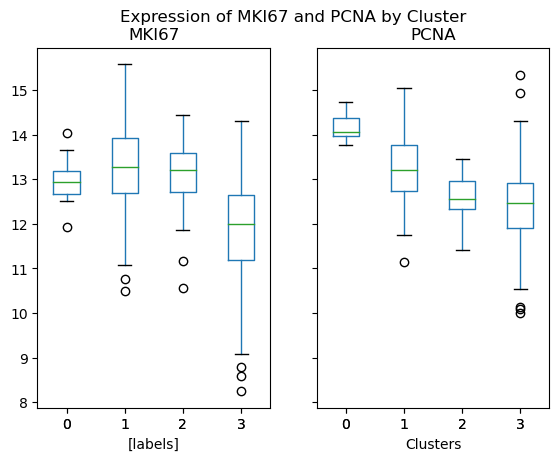

In [177]:
#Boxplots to analyze MUC1 and MUC16 expression across clusters
#The labels that are not corresponding to the final figures used 
#were changed in the slides using textboxes.
mk_pc= ["MKI67", "PCNA"]
mk_pc_counts= log2counts.loc[: , mk_pc]

#labels from the clusters we used
labels= [3,1,3,3,3,1,1,1,3,2,3,3,1,1,1,3,0,3,3,3,1,1,2,0,3,3,1,3,1,-1,3,3,3,1,3,1,2,2,2,3,3,3,1,1,3,3,0,3,3,1,1,1,3,1,2,1,2,1,3,3,2,3,0,3,1,1,3,3,1,3,1,1,2,3,1,3,1,3,1,1,1,3,1,1,1,2,1,1,3,1,3,1,1,3,1,3,3,0,0,3,1,1,3,1,1,3,1,3,3,1,2,1,1,2,1,3,1,3,-1,1,3,1,1,2,-1,3,3,3,3,1,2,3,2,3,3,3,3,1,1,1,1,1,3,1,2,3,3,1,3,1,3,1,3,3,3,3,3,1,3,3,3,3,3,3,1,1,3,1,3,2,2,1,2,3,3,3,3,1,3,3,3,3,1,3,1,3,3,3,3,3,3,3,3,2,3,3,3,3,3,1,3,3,3,3,2,3,1,3,3,2,3,3,3,3,1,3,3,3,2,0,1,1,1,1,1,3,1,3,3,1,1,3,3,3,3,1,3,3,1,1,1,1,1,3,2,3,2,3,1,3,3,1,1,3,1,3,-1,1,3,3,3,1,3,3,0,3,3,3,2,1,3,3,2,3,3,3,1,3,3,3,1,1,1,3,3,3,1,3,3,1,3,1,1,1,3,3,1,1,1,1,1,1,1,3,3,3,3,0,1,1,3,3,3,0,3,3,1,3,1,1,3,3,1,1,3,1,3,1,1,3,1,1,1,1,3,1,3,1,3,1,1,3,3,3,1,3,1,3,0,-1,3,1,3,1,1,3,2,1,1,3,3,3,1,3,2,1,2,1,1,3,1,1,3,3,3,3,3,1,3,2,1,1,3,3,3,3,1,0,3,3,1,1,1,1,1,1,1,3,1,3,1,0,2,1,3,3,3,1,3,3,1,1,1,1,2,1,1,3,1,2,3,3,3,2,1,1,3,3,2]
mk_pc_counts["labels"]= labels

#remove outlier cluster
mkpc_mask= mk_pc_counts["labels"]!= -1
mk_pc_cleaned=mk_pc_counts.loc[mkpc_mask,: ].copy()
cd274_cleaned.boxplot(by="labels", grid=False)
plt.suptitle("Expression of MKI67 and PCNA by Cluster")
plt.xlabel("Clusters")
plt.show()

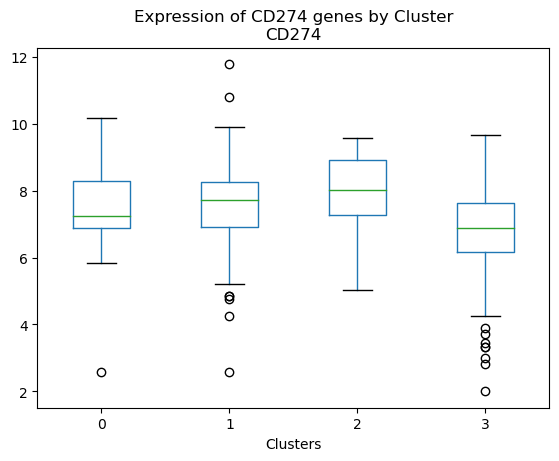

In [170]:
#Boxplots for CD274 expression analysis
cd_df= log2counts.loc[:, "CD274"]
cd_df= pd.DataFrame(cd_df)
cd_df["labels"]= labels
cd_m= cd_df["labels"]!= -1
cd_cleaned=cd_df.loc[cd_m, :].copy()
cd_cleaned.boxplot(by="labels", grid=False)
plt.suptitle("Expression of CD274 genes by Cluster")
plt.xlabel("Clusters")
plt.show()